# Books Recommender Using Clustering | Collaborative Based

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
books = pd.read_csv('data/BX-Books.csv',sep=";",on_bad_lines='skip',encoding='latin-1')

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_11376\1083860936.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/BX-Books.csv',sep=";",on_bad_lines='skip',encoding='latin-1')


In [8]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...

In [9]:
books.shape

(271360, 8)

In [10]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [11]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']]

In [12]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-L  
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...  
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...

In [13]:
books.rename(columns={
    "Book-Title" : "title",
    "Book-Author" : "author",
    "Year-Of-Publication" : "year",
    "Publisher" : "publisher",
    "Image-URL-L" : "img_url",
},  inplace = True)

In [14]:
books.head(2)

ISBN                title                author  year  \
0  0195153448  Classical Mythology    Mark P. O. Morford  2002   
1  0002005018         Clara Callan  Richard Bruce Wright  2001   

                 publisher                                            img_url  
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...  
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...

In [15]:
users = pd.read_csv('data/BX-Users.csv',sep=";",on_bad_lines='skip',encoding='latin-1')

In [16]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [17]:
users.shape

(278858, 3)

In [18]:
ratings = pd.read_csv('data/BX-Book-Ratings.csv',sep=";",on_bad_lines='skip',encoding='latin-1')

In [19]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [20]:
ratings.shape

(1149780, 3)

In [21]:
ratings.rename(columns={
     "User-ID" : "user_id",
     "Book-Rating":"rating"   
},inplace=True)

In [22]:
ratings.head()

user_id        ISBN  rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028       6

In [23]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


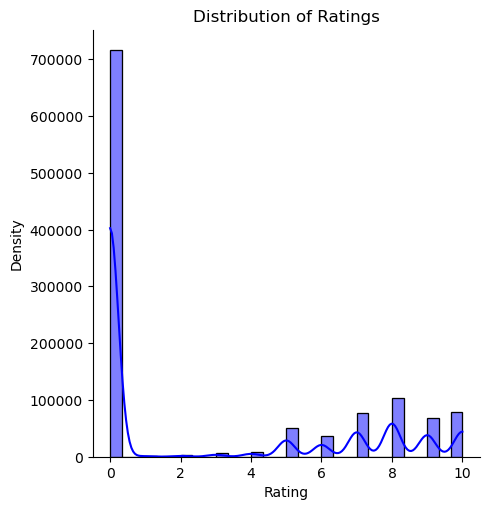

In [24]:
import seaborn as sns
sns.displot(ratings['rating'], kde=True, bins=30, color='blue')


plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

plt.show()

In [25]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [26]:
ratings['user_id'].unique().shape

(105283,)

In [27]:
x = ratings['user_id'].value_counts() > 200

In [28]:
x[x].shape

(899,)

In [29]:
y = x[x].index

In [30]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [31]:
# those user more than 200 ratings showing
ratings = ratings[ratings['user_id'].isin(y)]

In [32]:
ratings.head()

user_id        ISBN  rating
1456   277427  002542730X      10
1457   277427  0026217457       0
1458   277427  003008685X       8
1459   277427  0030615321       0
1460   277427  0060002050       0

In [33]:
ratings.shape

(526356, 3)

In [34]:
books.head(2)

ISBN                title                author  year  \
0  0195153448  Classical Mythology    Mark P. O. Morford  2002   
1  0002005018         Clara Callan  Richard Bruce Wright  2001   

                 publisher                                            img_url  
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...  
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...

In [35]:
ratings_with_books = ratings.merge(books,on ="ISBN")

In [36]:
ratings_with_books.head()

user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   
2   277427  003008685X       8   
3   277427  0030615321       0   
4   277427  0060002050       0   

                                               title                 author  \
0  Politically Correct Bedtime Stories: Modern Ta...      James Finn Garner   
1                 Vegetarian Times Complete Cookbook             Lucy  Moll   
2                                           Pioneers  James Fenimore Cooper   
3   Ask for May, Settle for June (A Doonesbury book)          G. B. Trudeau   
4                  On a Wicked Dawn (Cynster Novels)      Stephanie Laurens   

   year                  publisher  \
0  1994  John Wiley &amp; Sons Inc   
1  1995      John Wiley &amp; Sons   
2  1974           Thomson Learning   
3  1982        Henry Holt &amp; Co   
4  2002                 Avon Books   

                                             img_url  
0  http://images.amazon.com/images/P/002542730X.0...  
1  http://images.amazon.com/images/P/0026217457.0...  
2  http://images.amazon.com/images/P/003008685X.0...  
3  http://images.amazon.com/images/P/0030615321.0...  
4  http://images.amazon.com/images/P/0060002050.0...

In [37]:
ratings_with_books.shape

(487671, 8)

In [38]:
# which are the specific books got rating - bacause we want those books got more than 50 ratings

num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [39]:
num_rating.head()

title  rating
0   A Light in the Storm: The Civil War Diary of ...       2
1                              Always Have Popsicles       1
2               Apple Magic (The Collector's series)       1
3   Beyond IBM: Leadership Marketing and Finance ...       1
4   Clifford Visita El Hospital (Clifford El Gran...       1

In [40]:
num_rating.rename(columns={
    "rating" : "num_of_rating"
},inplace = True)

In [41]:
num_rating.head()

title  num_of_rating
0   A Light in the Storm: The Civil War Diary of ...              2
1                              Always Have Popsicles              1
2               Apple Magic (The Collector's series)              1
3   Beyond IBM: Leadership Marketing and Finance ...              1
4   Clifford Visita El Hospital (Clifford El Gran...              1

In [42]:
ratings_with_books.head(2)

user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   

                                               title             author  year  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
1                 Vegetarian Times Complete Cookbook         Lucy  Moll  1995   

                   publisher  \
0  John Wiley &amp; Sons Inc   
1      John Wiley &amp; Sons   

                                             img_url  
0  http://images.amazon.com/images/P/002542730X.0...  
1  http://images.amazon.com/images/P/0026217457.0...

In [43]:
final_rating = ratings_with_books.merge(num_rating, on='title')

In [44]:
final_rating.head(2)

user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   

                                               title             author  year  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
1                 Vegetarian Times Complete Cookbook         Lucy  Moll  1995   

                   publisher  \
0  John Wiley &amp; Sons Inc   
1      John Wiley &amp; Sons   

                                             img_url  num_of_rating  
0  http://images.amazon.com/images/P/002542730X.0...             82  
1  http://images.amazon.com/images/P/0026217457.0...              7

In [45]:
final_rating.shape

(487671, 9)

In [46]:
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [47]:
final_rating.shape

(61853, 9)

In [48]:
final_rating.head()

user_id        ISBN  rating  \
0    277427  002542730X      10   
13   277427  0060930535       0   
15   277427  0060934417       0   
18   277427  0061009059       9   
24   277427  006440188X       0   

                                                title  \
0   Politically Correct Bedtime Stories: Modern Ta...   
13                      The Poisonwood Bible: A Novel   
15                                 Bel Canto: A Novel   
18  One for the Money (Stephanie Plum Novels (Pape...   
24                                  The Secret Garden   

                     author  year                  publisher  \
0         James Finn Garner  1994  John Wiley &amp; Sons Inc   
13       Barbara Kingsolver  1999                  Perennial   
15             Ann Patchett  2002                  Perennial   
18          Janet Evanovich  1995                HarperTorch   
24  Frances Hodgson Burnett  1998               HarperTrophy   

                                              img_url  num_of_rating  
0   http://images.amazon.com/images/P/002542730X.0...             82  
13  http://images.amazon.com/images/P/0060930535.0...            133  
15  http://images.amazon.com/images/P/0060934417.0...            108  
18  http://images.amazon.com/images/P/0061009059.0...            108  
24  http://images.amazon.com/images/P/006440188X.0...             79

In [49]:
final_rating.sample(10)

user_id        ISBN  rating                                title  \
135775    77940  0671004565       0                     We'll Meet Again   
288765   169699  051511992X       0                   That Camden Summer   
296562   172742  0380018179       0                      The Thorn Birds   
285016   167471  0385475721       0                   The Blind Assassin   
305176   177432  0451180232       8         Nightmares &amp; Dreamscapes   
468388   264317  0345420748       0                     While I Was Gone   
465923   262399  0786817879       0  Artemis Fowl (Artemis Fowl, Book 1)   
57515     30972  0440218535       0               Smilla's Sense of Snow   
99394     53729  0316666343       8            The Lovely Bones: A Novel   
262263   153662  0345361393       0                       The Apprentice   

                           author  year         publisher  \
135775         Mary Higgins Clark  2000            Pocket   
288765            Lavyrle Spencer  1997        Jove Books   
296562         Colleen McCullough  1978              Avon   
285016            Margaret Atwood  2000     Nan A. Talese   
305176               Stephen King  2004       Signet Book   
468388                 Sue Miller  2002  Ballantine Books   
465923                Eoin Colfer  2003      Miramax Kids   
57515                  Peter Hoeg  1997            Island   
99394                Alice Sebold  2002     Little, Brown   
262263  Talmadge-Bickmore Deborah  1989     Del Rey Books   

                                                  img_url  num_of_rating  
135775  http://images.amazon.com/images/P/0671004565.0...             88  
288765  http://images.amazon.com/images/P/051511992X.0...             74  
296562  http://images.amazon.com/images/P/0380018179.0...            110  
285016  http://images.amazon.com/images/P/0385475721.0...             73  
305176  http://images.amazon.com/images/P/0451180232.0...             62  
468388  http://images.amazon.com/images/P/0345420748.0...            140  
465923  http://images.amazon.com/images/P/0786817879.0...            105  
57515   http://images.amazon.com/images/P/0440218535.0...             82  
99394   http://images.amazon.com/images/P/0316666343.0...            270  
262263  http://images.amazon.com/images/P/0345361393.0...             50

In [50]:
final_rating.shape

(61853, 9)

In [51]:
# remove duplicate
final_rating.drop_duplicates(['user_id','title'],inplace = True)

In [52]:
final_rating.shape

(59850, 9)

In [53]:
final_rating

user_id        ISBN  rating  \
0        277427  002542730X      10   
13       277427  0060930535       0   
15       277427  0060934417       0   
18       277427  0061009059       9   
24       277427  006440188X       0   
...         ...         ...     ...   
487505   275970  1400031354       0   
487506   275970  1400031362       0   
487579   275970  1573229725       0   
487618   275970  1586210661       9   
487619   275970  1586212230       0   

                                                    title  \
0       Politically Correct Bedtime Stories: Modern Ta...   
13                          The Poisonwood Bible: A Novel   
15                                     Bel Canto: A Novel   
18      One for the Money (Stephanie Plum Novels (Pape...   
24                                      The Secret Garden   
...                                                   ...   
487505  Tears of the Giraffe (No.1 Ladies Detective Ag...   
487506  Morality for Beautiful Girls (No.1 Ladies Dete...   
487579                                        Fingersmith   
487618                             Me Talk Pretty One Day   
487619                                              Naked   

                         author  year                  publisher  \
0             James Finn Garner  1994  John Wiley &amp; Sons Inc   
13           Barbara Kingsolver  1999                  Perennial   
15                 Ann Patchett  2002                  Perennial   
18              Janet Evanovich  1995                HarperTorch   
24      Frances Hodgson Burnett  1998               HarperTrophy   
...                         ...   ...                        ...   
487505   Alexander McCall Smith  2002                     Anchor   
487506   Alexander McCall Smith  2002                     Anchor   
487579             Sarah Waters  2002            Riverhead Books   
487618            David Sedaris  2001    Time Warner Audio Major   
487619            David Sedaris  2001    Time Warner Audio Major   

                                                  img_url  num_of_rating  
0       http://images.amazon.com/images/P/002542730X.0...             82  
13      http://images.amazon.com/images/P/0060930535.0...            133  
15      http://images.amazon.com/images/P/0060934417.0...            108  
18      http://images.amazon.com/images/P/0061009059.0...            108  
24      http://images.amazon.com/images/P/006440188X.0...             79  
...                                                   ...            ...  
487505  http://images.amazon.com/images/P/1400031354.0...             84  
487506  http://images.amazon.com/images/P/1400031362.0...             60  
487579  http://images.amazon.com/images/P/1573229725.0...             59  
487618  http://images.amazon.com/images/P/1586210661.0...            146  
487619  http://images.amazon.com/images/P/1586212230.0...             53  

[59850 rows x 9 columns]

# pivot table- generate a matrix and it contains 
#  user_id     254      255 ...
#  title    4 blonds harry potter    add ratings as well 
# similar kind of interest 
# we make a cluster and add them becaue they have simillar kind of interest and recomand that book also 
# base on the similar ratings value 
# matrix to pass clustering model and it will identify similar kind of users 


In [55]:
book_pivot = final_rating.pivot_table(columns = 'user_id',index='title',values = 'rating')

In [56]:
book_pivot

user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     7.0   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   NaN  ...     NaN   
1st to Die: A Novel                                    NaN  ...     NaN   
2nd Chance                                             NaN  ...     NaN   
4 Blondes                                              0.0  ...     NaN   
84 Charing Cross Road                                  NaN  ...     NaN   
...                                                    ...  ...     ...   
Year of Wonders                                        NaN  ...     NaN   
You Belong To Me                                       NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     NaN   
Zoya                                                   NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [57]:
book_pivot.shape

(742, 888)

In [58]:
book_pivot.fillna(0, inplace = True)

In [59]:
book_pivot

user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     7.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
84 Charing Cross Road                                  0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [60]:
# csr matrix automaticly 0 will not be consider - 
from scipy.sparse import csr_matrix

In [61]:
book_sparse = csr_matrix(book_pivot)

In [62]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14961 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')


In [64]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [65]:
distance , suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [66]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [67]:
suggestion

array([[237, 238, 240, 241, 184, 536]], dtype=int64)

In [68]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [69]:
book_pivot.index[3]

'4 Blondes'

In [70]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [71]:
books_name = book_pivot.index

In [72]:
import pickle
pickle.dump(model, open('artifacts/model.pkl','wb'))
pickle.dump(books_name, open('artifacts/books_name.pkl','wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl','wb'))


In [73]:
np.where(book_pivot.index == '4 Blondes')[0][0]

3

In [74]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name) [0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [75]:
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall
